<h1 style="font-size:42px; font-family:Georgia;">
Predicting Heart Disease Using Decision Trees 💊
</h1>

<img src="resources/project_image.jpg"></img>

<p style="font-style:italic; font-family:Georgia;">
Arman Rezaei<br>
9723034<br><br>
June 10, 2021
</p>

## Project Goals and Description

**Source**

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Data Description**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

**Data Overview**

- Dataset Characteristics: _Multivariate_
- Number of Instances: _303_
- Area: _Life_
- Attribute Characteristics: _Categorical, Integer, Real_
- Number of Attributes: _75_
- Date Donated: _1988-07-01_
- Associated Tasks: _Classification_
- Missing Values? _Yes_

**Attribute Information**

1. age: _age in years_
2. sex: _sex_
    - _1: male_
    - _0: female_
3. cp: _chest pain type_
    - _Value 1: typical angina_
    - _Value 2: atypical angina_
    - _Value 3: non-anginal pain_
    - _Value 4: asymptomatic_
4. trestbps: _resting blood pressure (in mmHg on admission to the hospital)_
5. chol: _serum cholestoral in mg/dl_
6. fbs: _fasting blood sugar > 120 mg/dl_
    - _1: true_
    - _0: false_
7. restecg: _resting electrocardiographic results_
    - _Value 0: normal_
    - _Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)_
    - _Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria_
8. thalach: _maximum heart rate achieved_
9. exang: _exercise induced angina_
    - _1: yes_
    - _0: no_
10. oldpeak: _ST depression induced by exercise relative to rest_
11. slope: _the slope of the peak exercise ST segment_
    - _Value 1: upsloping_
    - _Value 2: flat_
    - _Value 3: downsloping_
12. ca: _number of major vessels (0-3) colored by flourosopy_
13. thal:
    - _3: normal_
    - _6: fixed defect_
    - _7: reversable defect_
14. hdtype: _type of heart disease_

**Accuracy Comparison of Different Models Used on This Dataset**

<img src='resources/heart_disease_accuracies.png'></img>

We will be using the Decision Tree Classifier to achieve a similar accuracy.

**Why Decision Trees?**

Some of the benefits of using Decision Trees include

- Work extremely well on categorical data
- Simple and explainable
- Great interpretability
- Ability to visualize
- Efficiency
- Not affected by collinearity

**Papers Citing This Dataset**

A complete list of researches on this dataset are available in [this link](https://archive-beta.ics.uci.edu/ml/datasets/45/#Papers-Citing-This-Data-Set).

## First Steps

We start by importing the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

And proceed to import the data. We can acquire our data directly from the UCI Machine Learning Repository using the `read_csv` function from `Pandas`. According to the data description, `NaN` values are denoted by `?`.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp',
           'trestbps', 'chol',
           'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope',
           'ca', 'thal', 'hdtype']

df = pd.read_csv(url,
                 names=columns,
                 na_values='?')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hdtype
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  hdtype    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Dealing with Missing Values

It appears that our dataset contains a few null values. We can confirm this using the `isna` method of our DataFrame `df`. 

In [ ]:
df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hdtype
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


Since there are only 6 columns in our dataset that contain missing values and since imputing data is an expensive and time consuming operation, we can just drop them. Not a lot of data are lost.

In [ ]:
df_nona = df.dropna()
df_nona.shape

(297, 14)

## Preparing the Data

Our main _target_ is predicting the values of `hdtype`. So everything else are called _features_.

In [ ]:
X = df_nona.drop(columns='hdtype')
y = df_nona.hdtype

Since `sklearn` can't natively handle categorical data, if we pass the dataframe as-is, it will treat the 1, 2, 3 and 4 categories of some columns (such as `cp`) as sequential values, and this affects the accuracy of the model for the worse. In order to deal with this problem, we will be **One-Hot Encoding** our categorical values using `pd.get_dummies`.

In [ ]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


Also, since the numbers 1-4 denote different heart diseases and 0 denotes the absence of heart disease, and since we only care about whether or not a patient has heart disease, we will be denoting the values 1-4 as `True` and 0 as `False`.

In [ ]:
y_encoded = y.astype('bool')
y_encoded.value_counts()

False    160
True     137
Name: hdtype, dtype: int64

We now split our data into two sets: The **train set** and the **test set**. the training set will be used to _train_ the model and the test set will be used to _evaluate_ it. We will also use the `random_state` parameter to produce consistent results across different runs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=42)

## Training a Preliminary Model

The inital model we are going to build is going to be un-pruned; meaning it will fit the training data **perfectly**! Decision Trees are actually notorious for overfitting training data. After that, we will use methods to prune our tree and compare the results with the inital results we will now acquire.

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

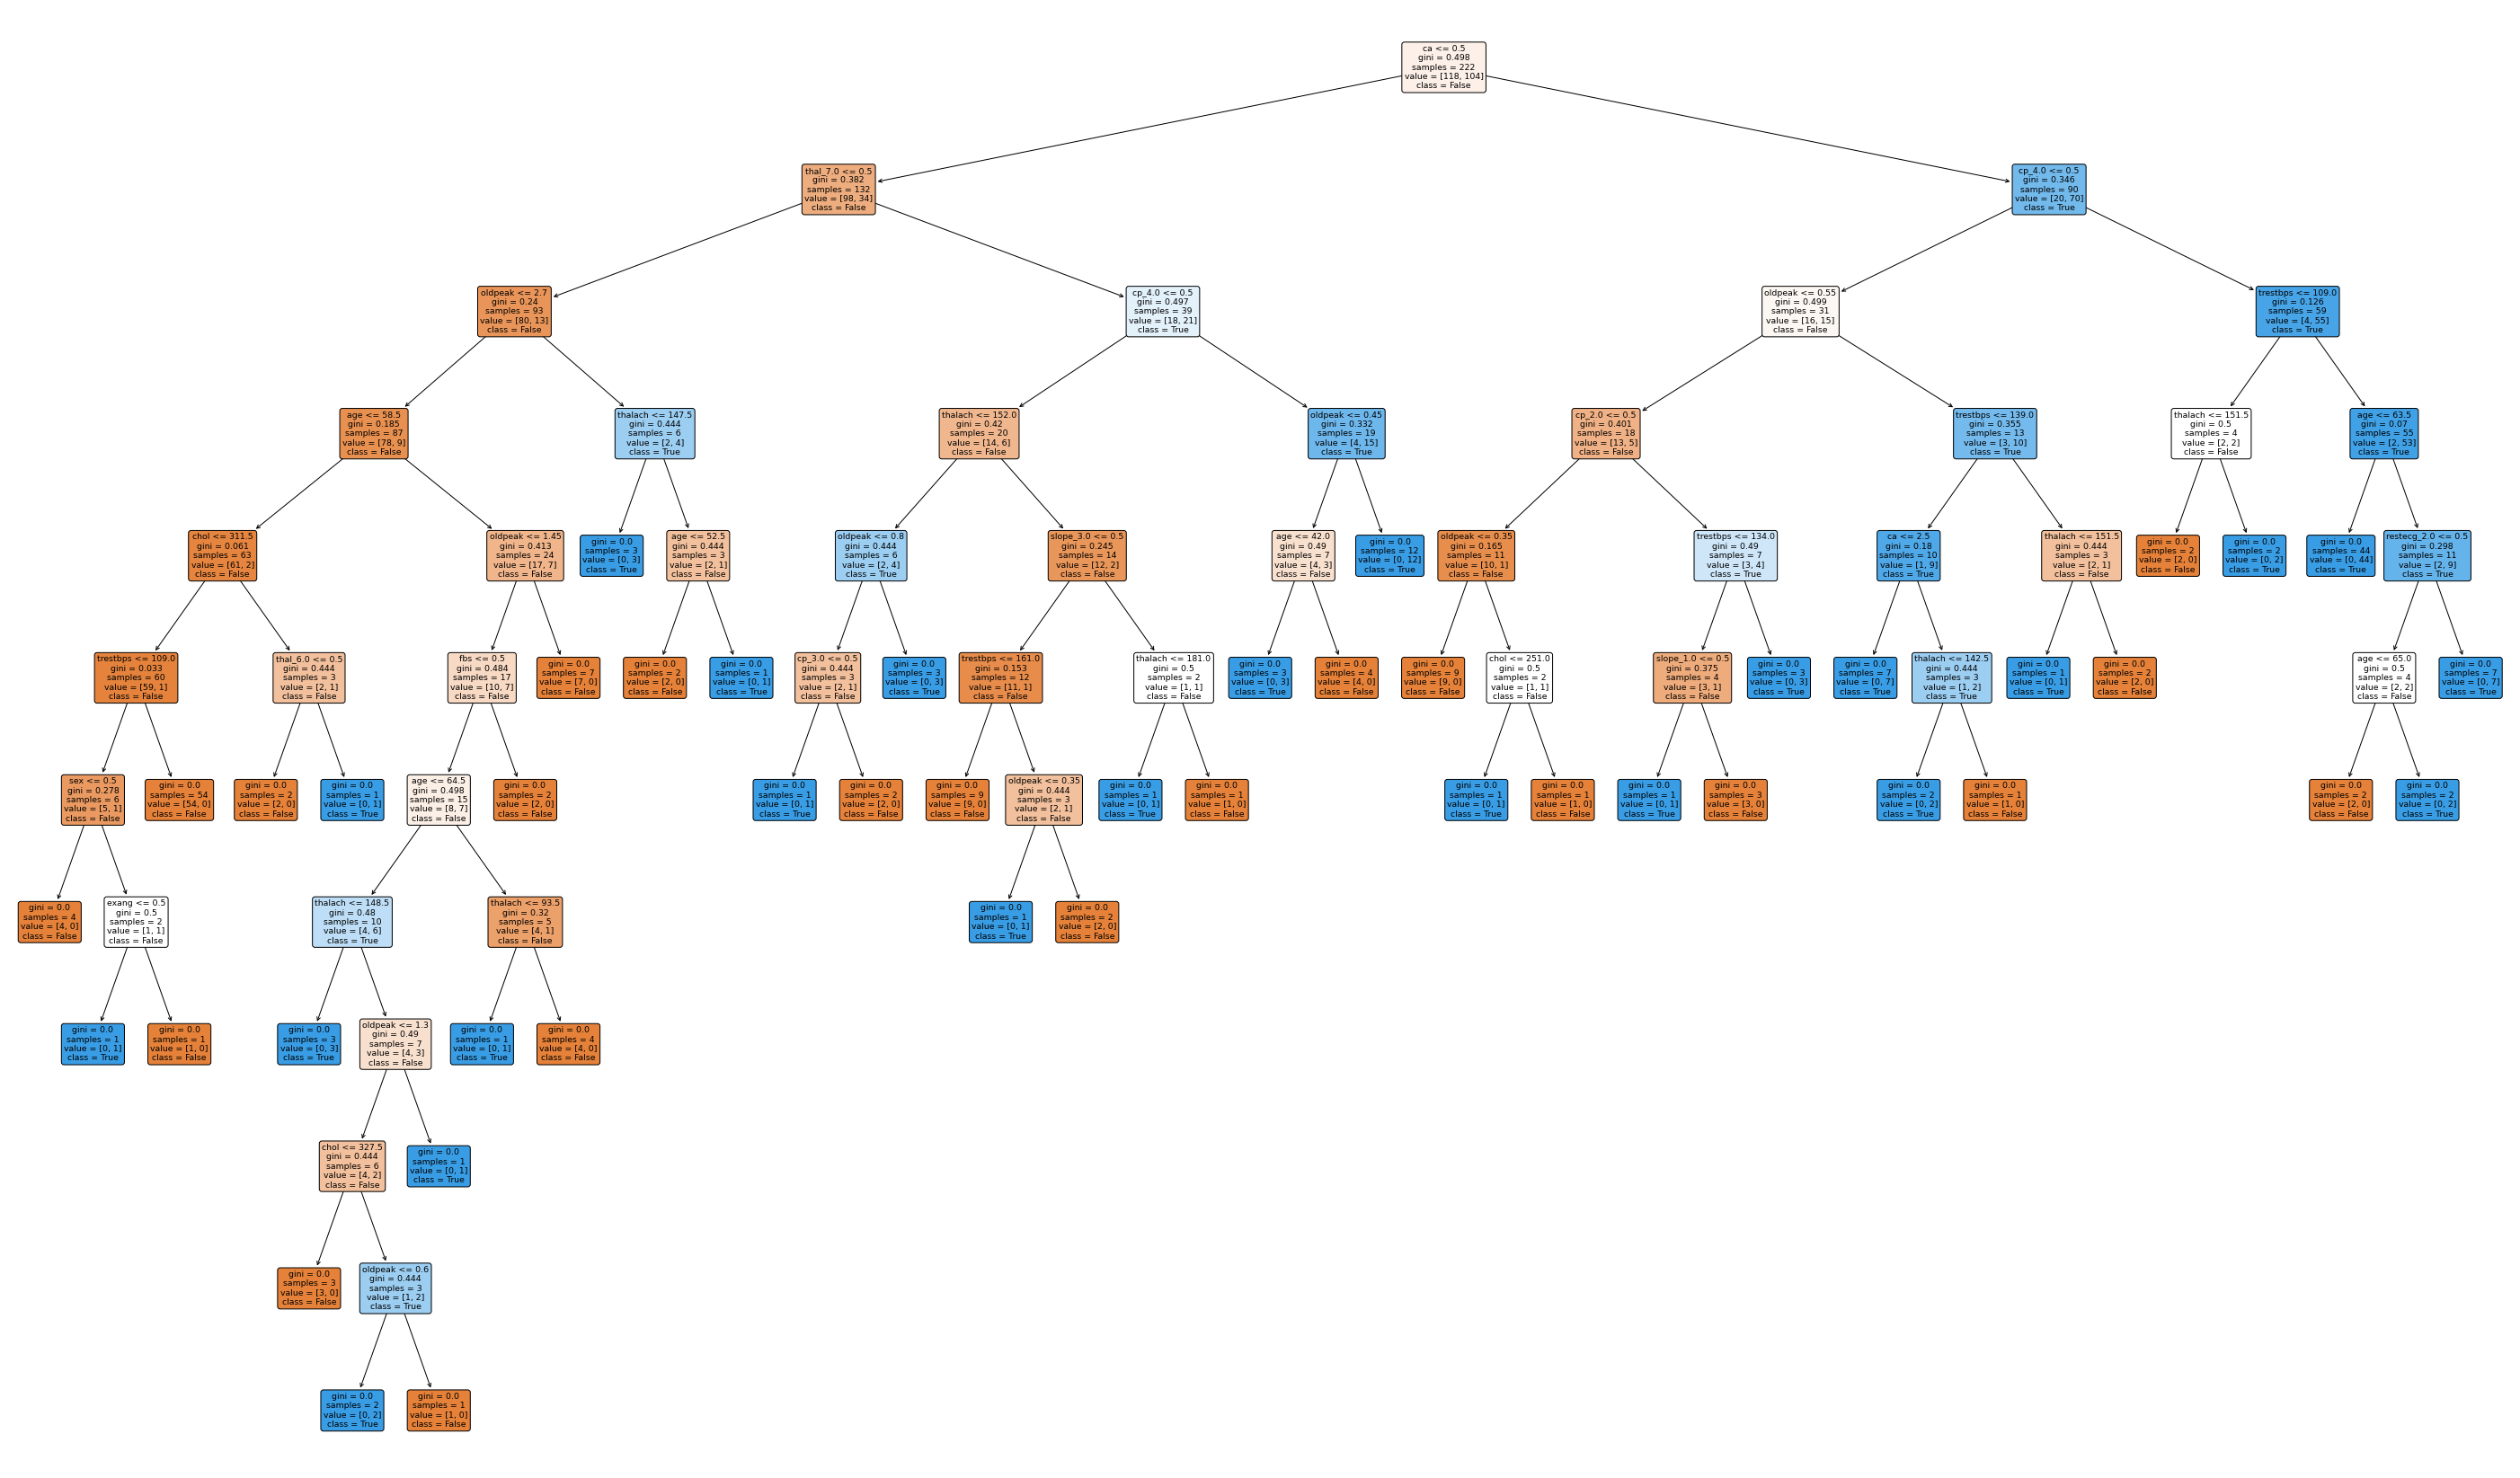

In [ ]:
plt.figure(figsize=(50, 30))
plot_tree(dtree, filled=True, rounded=True, feature_names=X_encoded.columns, class_names=['False', 'True'])
plt.show()

As you can see, the tree is HUGE! But does it actually do a good job at predicting heart disease? We answer this questiong using a `confusion_matrix`.

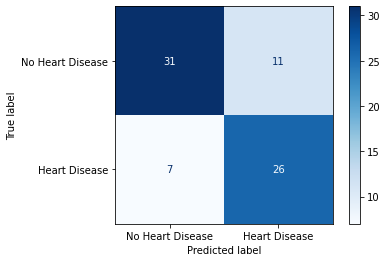

In [ ]:
plot_confusion_matrix(dtree, X_test, y_test,
                      display_labels=['No Heart Disease', 'Heart Disease'],
                      cmap='Blues')
plt.show()

We can acquire the statistics of this matrix via `classification_report`.

In [ ]:
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.82      0.74      0.78        42
        True       0.70      0.79      0.74        33

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



We can see that the accuracy of the model is about 76%. Now, we will optimize our model.

## Optimizing Our Model

Minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting. This algorithm is parameterized by $\alpha > 0$ known as _the complexity parameter_. The complexity parameter is used to define the cost-complexity measure, $R_{\alpha}(T)$ of a given tree $T$:

$$
R_{\alpha}(T) = R(T) + \alpha|\tilde{T}|
$$

Where $|\tilde{T}|$ is the number of terminal (leaf) nodes in $T$ and $R(T)$ is traditionally defined as the total misclassification rate of the terminal nodes. Therefore, higher number of terminal nodes results in higher penalty. `sklearn` will calculate different $R_{\alpha}(T)$s for a given $\alpha$ (by pruning trees) and use the tree with the least $R_{\alpha}(T)$ as the chosen model.

The `cost_complexity_pruning_path` method will generate different $\alpha$ values to use with our model.

In [ ]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # remove largest value, creating a tree with only a root

Create different models with different $\alpha$ values:

In [ ]:
dtrees = []
for alpha in ccp_alphas:
  dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
  dt.fit(X_train, y_train)
  dtrees.append(dt)

We may now visualize the effect of different $\alpha$ values on training and testing accuracies:

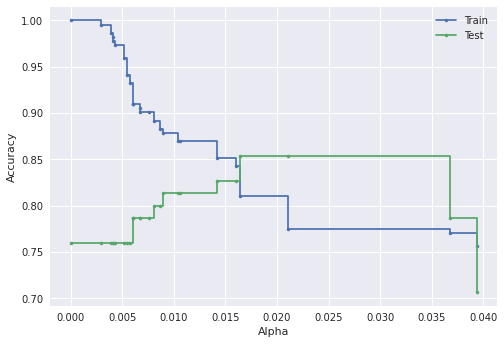

In [ ]:
train_scores = [dt.score(X_train, y_train) for dt in dtrees]
test_scores = [dt.score(X_test, y_test) for dt in dtrees]

plt.style.use('seaborn')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas, train_scores, label='Train', marker='.', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, label='Test', marker='.', drawstyle='steps-post')

plt.legend()
plt.show()

#### Addressing a Small Issue

We can see that the optimal value for alpha is around 0.016 with an accuracy of around 86%. But what if the data were split in some other way? 

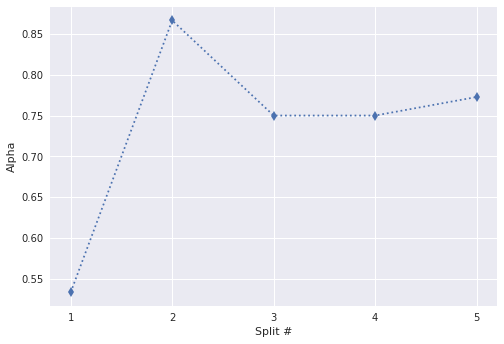

In [ ]:
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(dt, X_train, y_train, cv=5)

plt.plot(range(1, 6), scores, marker='d', linestyle=':')

plt.xticks(range(1, 6))
plt.xlabel('Split #')
plt.ylabel('Alpha')

plt.show()

We can see that a specific split (split number 1) can greatly affect the accuracy of a model. So we should try and use the mean accuracy of _a set of splits_ instead of relying on just _one single split_.

In [ ]:
alpha_loop_values = []
for alpha in ccp_alphas:
  dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
  scores = cross_val_score(dt, X_train, y_train, cv=5)
  alpha_loop_values.append([alpha, np.mean(scores), np.std(scores)])

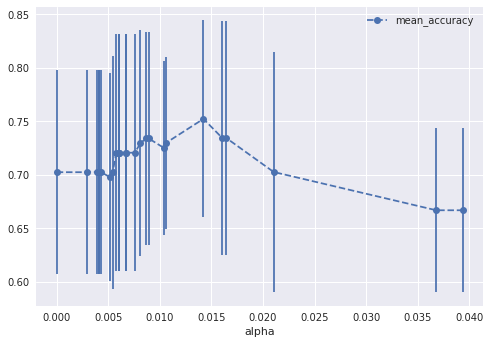

In [ ]:
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy','std_accuracy'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std_accuracy', marker='o', linestyle='--')
plt.show()

## Building Our Final Tree

In [ ]:
# extract the alpha value of max score 
ideal_alpha = max(alpha_loop_values, key=lambda x: x[1])[0]

In [ ]:
# create tree using ideal alpha
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_alpha)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

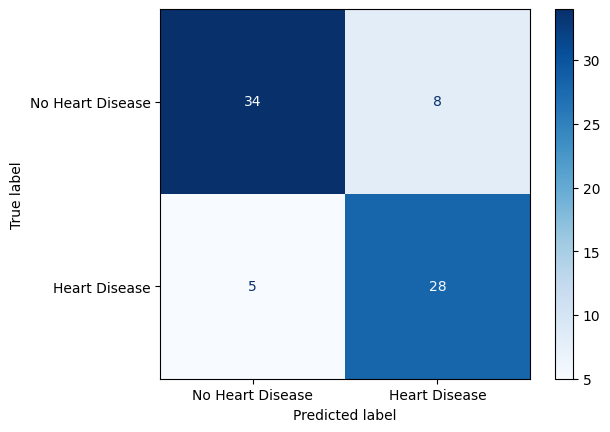

In [ ]:
plt.style.use('default')
plot_confusion_matrix(dt_pruned, X_test, y_test,
                      display_labels=['No Heart Disease', 'Heart Disease'],
                      cmap='Blues')
plt.show()

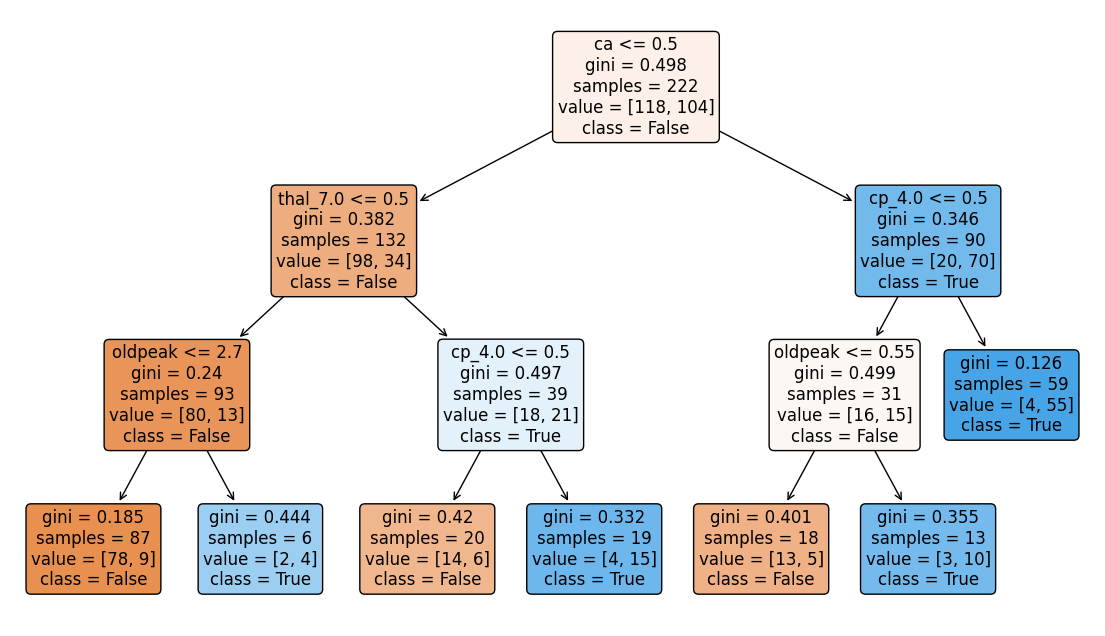

In [ ]:
plt.figure(figsize=(14, 8))
plot_tree(dt_pruned, filled=True, rounded=True, feature_names=X_encoded.columns, class_names=['False', 'True'])
plt.show()

In [ ]:
y_pred = dt_pruned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.81      0.84        42
        True       0.78      0.85      0.81        33

    accuracy                           0.83        75
   macro avg       0.82      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



We can see that the accuracy has improved to 83%!

## Conclusion

Decision Trees are great for creating models to classify different datasets. Done correctly, we can see from the chart at the top of this notebook that they can easily outperform other classification models such as SVMs.